In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import scipy.stats as stats

### Cigarettes per day

In [3]:
cigs_per_day = np.random.poisson(5, size=5000)
count = np.bincount(cigs_per_day)
count[0]

36

### BMI

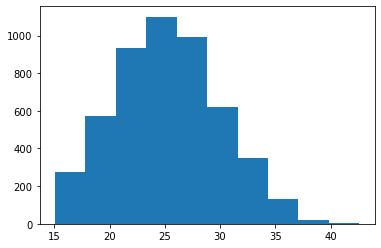

In [4]:
lower = 15
upper = 50
mu = 25
sigma = 5
N = 5000

bmi = stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)


plt.hist(bmi)

plt.show()

### Cholesterol

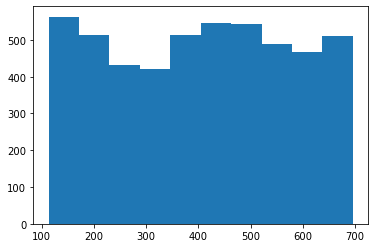

In [14]:
valuerange = np.arange(113,697)

p = np.random.rand(len(valuerange))
p = p / p.sum()

chol = np.random.choice(a=valuerange, size=5000, p=p)

plt.hist(chol)
plt.show()

## Dataframe

In [6]:
data = np.array([cigs_per_day,bmi,chol])

print(data)

[[  7.           5.           5.         ...   5.           5.
    4.        ]
 [ 28.4298766   24.07236718  27.43066864 ...  28.05308649  26.54517638
   22.9768869 ]
 [330.         337.         406.         ... 273.         262.
  683.        ]]


In [7]:
df = pd.DataFrame(data).transpose()

In [8]:
df.columns = ['Cigarettes per day', 'BMI', 'Cholesterol']
df

,Cigarettes per day,BMI,Cholesterol
0,7.0,28.429877,330.0
1,5.0,24.072367,337.0
2,5.0,27.430669,406.0
3,4.0,19.454446,571.0
4,3.0,29.218041,522.0
...,...,...,...
4995,8.0,20.666335,333.0
4996,6.0,27.746326,228.0
4997,5.0,28.053086,273.0
4998,5.0,26.545176,262.0


In [10]:
#Define list of conditions

conditions = [
    (df['Cigarettes per day'] >= 5) & (df['BMI'] >= 30) & (df['Cholesterol'] >= 240),
    (df['Cigarettes per day'] >= 10) & (df['BMI'] >= 20) & (df['Cholesterol'] >= 200),
    (df['Cigarettes per day'] >= 15) & (df['BMI'] >= 18.5),
    (df['Cigarettes per day'] >= 20),
    (df['BMI'] >= 30),
    (df['Cholesterol'] >= 350)
]



#Set the new column values according to conditions
risk = ['yes','yes','yes','yes','yes','yes']

#Add new column based on conditions and risk:
df['Risk of heart disease'] = np.select(conditions, risk, default='no')

df

,Cigarettes per day,BMI,Cholesterol,Risk of heart disease
0,7.0,28.429877,330.0,no
1,5.0,24.072367,337.0,no
2,5.0,27.430669,406.0,yes
3,4.0,19.454446,571.0,yes
4,3.0,29.218041,522.0,yes
...,...,...,...,...
4995,8.0,20.666335,333.0,no
4996,6.0,27.746326,228.0,no
4997,5.0,28.053086,273.0,no
4998,5.0,26.545176,262.0,no


In [11]:
df.loc[1000]

Cigarettes per day            4.0
BMI                      33.49995
Cholesterol                 502.0
Risk of heart disease         yes
Name: 1000, dtype: object